# Benchmark: e2 Scaling vs Constituent Count

This benchmark reports wall-clock scaling behavior of the two-point energy correlation `e2` as constituent count `N` grows.

In [1]:
from pathlib import Path
import sys

_root = Path().resolve()
if not (_root / 'src').exists():
    _root = _root.parent
sys.path.insert(0, str(_root / 'src'))

import time
import numpy as np
import matplotlib.pyplot as plt

from jetobsmc.jet import Jet
from jetobsmc.observables.shapes import energy_correlation_e2

In [2]:
rng = np.random.default_rng(13)
sizes = [10, 50, 100, 200, 400]
repeats = 40
times_ms = []

for n in sizes:
    batch = []
    for _ in range(repeats):
        px = rng.normal(0.0, 20.0, size=n)
        py = rng.normal(0.0, 20.0, size=n)
        pz = rng.normal(0.0, 25.0, size=n)
        p2 = px * px + py * py + pz * pz
        E = np.sqrt(p2 + rng.uniform(0.0, 10.0, size=n))
        batch.append(Jet(np.column_stack([E, px, py, pz])))

    t0 = time.perf_counter()
    for jet in batch:
        energy_correlation_e2(jet)
    elapsed_ms = (time.perf_counter() - t0) * 1000.0 / repeats
    times_ms.append(elapsed_ms)

for n, t in zip(sizes, times_ms):
    print(f'N={n:>3d} avg e2 time = {t:.4f} ms')

N= 10 avg e2 time = 0.0504 ms
N= 50 avg e2 time = 0.0992 ms
N=100 avg e2 time = 0.2682 ms
N=200 avg e2 time = 0.9607 ms
N=400 avg e2 time = 3.8403 ms


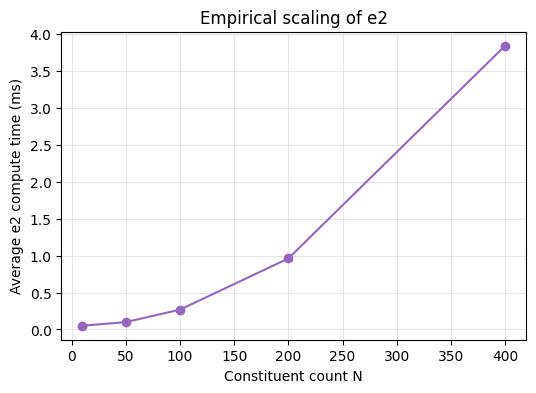

In [3]:
plt.figure(figsize=(6, 4))
plt.plot(sizes, times_ms, marker='o', color='tab:purple')
plt.xlabel('Constituent count N')
plt.ylabel('Average e2 compute time (ms)')
plt.title('Empirical scaling of e2')
plt.grid(alpha=0.3)
plt.show()

## Interpretation
- The observed growth should track approximately quadratic behavior due to pairwise combinations.
- Current implementation favors clarity and vectorized NumPy kernels.
- Future acceleration can use optional `numba` kernels for large MC scans.